In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
!python --version

Python 3.11.11


# Pytorch

## Tensor Attributes

In [1]:
import torch

- numpy array의 pytorch 버전이 tensor라고 생각하면 된다.
- tensor들을 수행해서 deeplearning 연산을 만든다고 보면 된다.
- tensor들은 동일한 메모리에 위치하고, 같은 자료형으로 연산하는 것이 좋다.
  

In [2]:
#tensor로 변환
torch.tensor([[2,2,3], [1,2,3], [4,5,6]])

tensor([[2, 2, 3],
        [1, 2, 3],
        [4, 5, 6]])

In [15]:
#setting device on GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('using device : ', device)

using device :  cuda


#### randn 함수 : 표준 정규분포에서 N(0,1) 에서 tensor를 sampling 함 

In [4]:
x = torch.randn((10,5))
x

tensor([[ 0.6661,  0.3484, -0.6785,  1.9109, -0.7193],
        [ 0.7405,  1.9168, -0.6214, -0.5459,  0.4558],
        [ 0.3950,  0.2864, -0.2343, -1.5620,  0.3247],
        [ 1.7496, -2.8440,  0.7365, -1.6200, -0.5933],
        [ 0.1508, -1.2158, -0.6910,  0.0501,  0.0865],
        [-0.3301,  1.5024, -0.5850, -0.5357, -0.2967],
        [-1.1333,  0.0761, -1.0697, -0.8773, -0.0478],
        [ 1.4485,  0.5826, -0.3022, -2.1605, -1.3697],
        [-0.9377,  1.5856,  0.8715, -0.5764,  0.6347],
        [-0.1265, -0.4645, -0.8170, -0.3853,  1.0534]])

In [19]:
#tensor의 기본 attribute 확인하기
print(x.shape)
print(x.size())
print(x.size(0))
print(x.dtype)
print(x.device)

torch.Size([10, 5])
torch.Size([10, 5])
10
torch.float32
cpu


In [5]:
x = x.to('cuda') #cuda로 바꾸기
x = x.to(torch.int32) #int로 바꾸기
print(x.dtype, x.device)

torch.int32 cuda:0


In [6]:
y = torch.randn((10,5), dtype = torch.half)  #half = 실수 자료형
print(x+y)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [7]:
y = y.cuda()
print(x+y)

tensor([[-1.9033, -2.2500, -2.1387, -0.7695, -0.0654],
        [ 2.6250,  1.6855, -0.0162,  1.7158,  0.2715],
        [-0.6289, -1.3545, -0.0398,  0.0967, -0.2408],
        [ 2.0664, -2.4766,  0.0669,  1.0176,  1.3984],
        [-0.7817, -1.2422, -0.4038, -0.8530,  0.4531],
        [-0.5957, -0.3330,  0.2249,  2.0840, -0.5781],
        [-0.1309, -0.6880, -0.9150,  1.8135,  0.6152],
        [ 0.3228,  0.8159, -0.6821, -2.0840, -2.4355],
        [ 1.0742,  1.4297, -0.8213,  1.0703, -1.0205],
        [-0.1440, -1.8828,  0.6060,  0.0099,  2.5703]], device='cuda:0',
       dtype=torch.float16)


In [8]:
#transpose tensor
print(x.t().size())
print(y.T.size()) 

torch.Size([5, 10])
torch.Size([5, 10])


- column -> row 로 row -> column으로 전치

In [9]:
y

tensor([[-1.9033, -2.2500, -2.1387, -1.7695, -0.0654],
        [ 2.6250,  0.6855, -0.0162,  1.7158,  0.2715],
        [-0.6289, -1.3545, -0.0398,  1.0967, -0.2408],
        [ 1.0674, -0.4758,  0.0669,  2.0176,  1.3984],
        [-0.7817, -0.2417, -0.4038, -0.8530,  0.4531],
        [-0.5957, -1.3330,  0.2249,  2.0840, -0.5781],
        [ 0.8691, -0.6880,  0.0849,  1.8135,  0.6152],
        [-0.6772,  0.8159, -0.6821, -0.0837, -1.4355],
        [ 1.0742,  0.4294, -0.8213,  1.0703, -1.0205],
        [-0.1440, -1.8828,  0.6060,  0.0099,  1.5693]], device='cuda:0',
       dtype=torch.float16)

In [10]:
y.T

tensor([[-1.9033,  2.6250, -0.6289,  1.0674, -0.7817, -0.5957,  0.8691, -0.6772,
          1.0742, -0.1440],
        [-2.2500,  0.6855, -1.3545, -0.4758, -0.2417, -1.3330, -0.6880,  0.8159,
          0.4294, -1.8828],
        [-2.1387, -0.0162, -0.0398,  0.0669, -0.4038,  0.2249,  0.0849, -0.6821,
         -0.8213,  0.6060],
        [-1.7695,  1.7158,  1.0967,  2.0176, -0.8530,  2.0840,  1.8135, -0.0837,
          1.0703,  0.0099],
        [-0.0654,  0.2715, -0.2408,  1.3984,  0.4531, -0.5781,  0.6152, -1.4355,
         -1.0205,  1.5693]], device='cuda:0', dtype=torch.float16)

In [11]:
print(x.size(), y.t().size())
print(x @ y.t()) #torch.matmul(x,y.t())

torch.Size([10, 5]) torch.Size([5, 10])


RuntimeError: expected mat1 and mat2 to have the same dtype, but got: int != c10::Half

- 행렬 곱할때 자료형 일치시켜야 함

In [12]:
print((x.half() @ y.t()).shape)

torch.Size([10, 10])


In [17]:
print(x.half() @ y.t())

tensor([[-1.7695e+00,  1.7158e+00,  1.0967e+00,  2.0176e+00, -8.5303e-01,
          2.0840e+00,  1.8135e+00, -8.3679e-02,  1.0703e+00,  9.8877e-03],
        [-2.2500e+00,  6.8555e-01, -1.3545e+00, -4.7583e-01, -2.4170e-01,
         -1.3330e+00, -6.8799e-01,  8.1592e-01,  4.2944e-01, -1.8828e+00],
        [ 1.7695e+00, -1.7158e+00, -1.0967e+00, -2.0176e+00,  8.5303e-01,
         -2.0840e+00, -1.8135e+00,  8.3679e-02, -1.0703e+00, -9.8877e-03],
        [ 4.3672e+00, -4.6191e-01,  9.8340e-01,  1.4648e-03,  5.5469e-01,
         -1.3672e-02,  4.3164e-01, -2.2246e+00, -8.5498e-01,  3.6113e+00],
        [ 2.2500e+00, -6.8555e-01,  1.3545e+00,  4.7583e-01,  2.4170e-01,
          1.3330e+00,  6.8799e-01, -8.1592e-01, -4.2944e-01,  1.8828e+00],
        [-2.2500e+00,  6.8555e-01, -1.3545e+00, -4.7583e-01, -2.4170e-01,
         -1.3330e+00, -6.8799e-01,  8.1592e-01,  4.2944e-01, -1.8828e+00],
        [ 4.0430e+00, -2.6094e+00,  6.6846e-01, -1.1348e+00,  1.1855e+00,
          3.7085e-01, -9.5410e-0

In [21]:
A = torch.arange(1,13).view(4,3)
B = torch.rand(4,3)

print(A)
print(B)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
tensor([[0.7025, 0.8607, 0.4563],
        [0.9614, 0.4800, 0.1643],
        [0.0254, 0.2583, 0.2449],
        [0.4296, 0.2676, 0.2852]])


In [115]:
A + 1

tensor([[ 2,  3,  4],
        [ 5,  6,  7],
        [ 8,  9, 10],
        [11, 12, 13]])

In [22]:
A + B

tensor([[ 1.7025,  2.8607,  3.4563],
        [ 4.9614,  5.4800,  6.1643],
        [ 7.0254,  8.2583,  9.2450],
        [10.4296, 11.2676, 12.2852]])

In [24]:
torch.sqrt(A)

tensor([[1.0000, 1.4142, 1.7321],
        [2.0000, 2.2361, 2.4495],
        [2.6458, 2.8284, 3.0000],
        [3.1623, 3.3166, 3.4641]])

In [25]:
torch.log(B)

tensor([[-0.3532, -0.1501, -0.7845],
        [-0.0394, -0.7339, -1.8063],
        [-3.6723, -1.3536, -1.4067],
        [-0.8449, -1.3181, -1.2545]])

In [28]:
A + torch.tensor([2,2,2])

tensor([[ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]])

In [30]:
A + torch.tensor([[1],
                 [1],
                 [2],
                 [2]])

tensor([[ 2,  3,  4],
        [ 5,  6,  7],
        [ 9, 10, 11],
        [12, 13, 14]])

# Tensor Operatons

In [53]:
# 3차원의 2x3x4 tensor 생성
x = torch.randn(2,3,4)

print(x)
print("\nOriginal Tensor (2x3x4):", x.size())


tensor([[[-1.2542,  0.5703, -2.5632,  0.3098],
         [ 0.3004, -0.0049,  0.7031,  1.9765],
         [-0.9310,  0.7601,  1.7485,  0.1743]],

        [[ 0.5098,  0.2020, -0.2613,  0.2906],
         [ 0.1021, -2.9910,  0.3476,  0.8128],
         [ 1.6094,  0.0791, -0.8035,  0.9230]]])

Original Tensor (2x3x4): torch.Size([2, 3, 4])


In [54]:
x_slice_0 = x[0]
print(x_slice_0)
print(x_slice_0.size())

tensor([[-1.2542,  0.5703, -2.5632,  0.3098],
        [ 0.3004, -0.0049,  0.7031,  1.9765],
        [-0.9310,  0.7601,  1.7485,  0.1743]])
torch.Size([3, 4])


In [55]:
x_slice_col_0 = x[:,0]
print(x_slice_col_0)
print(x_slice_col_0.size())

tensor([[-1.2542,  0.5703, -2.5632,  0.3098],
        [ 0.5098,  0.2020, -0.2613,  0.2906]])
torch.Size([2, 4])


In [56]:
x_slice_range = x[:, 1:3]
print(x_slice_range)
print(x_slice_range.size())

tensor([[[ 0.3004, -0.0049,  0.7031,  1.9765],
         [-0.9310,  0.7601,  1.7485,  0.1743]],

        [[ 0.1021, -2.9910,  0.3476,  0.8128],
         [ 1.6094,  0.0791, -0.8035,  0.9230]]])
torch.Size([2, 2, 4])


In [57]:
# mask tensor : boolen
mask = x > 0
x_masked = x[mask]
print(mask)

tensor([[[False,  True, False,  True],
         [ True, False,  True,  True],
         [False,  True,  True,  True]],

        [[ True,  True, False,  True],
         [ True, False,  True,  True],
         [ True,  True, False,  True]]])


In [58]:
# mask 된 값만 벡터로 반한
print(x_masked)
print(x[mask])

tensor([0.5703, 0.3098, 0.3004, 0.7031, 1.9765, 0.7601, 1.7485, 0.1743, 0.5098,
        0.2020, 0.2906, 0.1021, 0.3476, 0.8128, 1.6094, 0.0791, 0.9230])
tensor([0.5703, 0.3098, 0.3004, 0.7031, 1.9765, 0.7601, 1.7485, 0.1743, 0.5098,
        0.2020, 0.2906, 0.1021, 0.3476, 0.8128, 1.6094, 0.0791, 0.9230])


In [59]:
# mask로 값 할당
x[mask] = 10
x

tensor([[[-1.2542e+00,  1.0000e+01, -2.5632e+00,  1.0000e+01],
         [ 1.0000e+01, -4.8953e-03,  1.0000e+01,  1.0000e+01],
         [-9.3096e-01,  1.0000e+01,  1.0000e+01,  1.0000e+01]],

        [[ 1.0000e+01,  1.0000e+01, -2.6128e-01,  1.0000e+01],
         [ 1.0000e+01, -2.9910e+00,  1.0000e+01,  1.0000e+01],
         [ 1.0000e+01,  1.0000e+01, -8.0354e-01,  1.0000e+01]]])

## index를 이용한 슬라이싱

In [60]:
indices = torch.tensor([0,2]) #특정 인덱스 선택
x_indices = x[:, :, indices]
print(x_indices)
print(x_indices.size())

tensor([[[-1.2542, -2.5632],
         [10.0000, 10.0000],
         [-0.9310, 10.0000]],

        [[10.0000, -0.2613],
         [10.0000, 10.0000],
         [10.0000, -0.8035]]])
torch.Size([2, 3, 2])


In [61]:
x[:,:,indices] = -5  #특정 인덱스에 값 할당
print(x)

tensor([[[-5.0000e+00,  1.0000e+01, -5.0000e+00,  1.0000e+01],
         [-5.0000e+00, -4.8953e-03, -5.0000e+00,  1.0000e+01],
         [-5.0000e+00,  1.0000e+01, -5.0000e+00,  1.0000e+01]],

        [[-5.0000e+00,  1.0000e+01, -5.0000e+00,  1.0000e+01],
         [-5.0000e+00, -2.9910e+00, -5.0000e+00,  1.0000e+01],
         [-5.0000e+00,  1.0000e+01, -5.0000e+00,  1.0000e+01]]])


## Flatten 연산

In [64]:
# 2x3x4 텐서 생성
x = torch.randn(2, 3, 4)
print("Original Tensor:")
print(x)

Original Tensor:
tensor([[[ 0.1261,  0.7939,  0.8738, -1.9877],
         [ 0.8418, -1.0720, -1.3505, -0.3146],
         [-0.3829,  1.2034, -0.4817, -0.6005]],

        [[-0.0315,  2.0654, -0.8693,  1.0361],
         [-0.5854, -0.4746, -1.1065,  0.2110],
         [ 0.6010, -0.3940,  1.5028, -0.0583]]])


In [65]:
# 1D 벡터로 변환
x_flatten = x.flatten() 
print(x_flatten)

tensor([ 0.1261,  0.7939,  0.8738, -1.9877,  0.8418, -1.0720, -1.3505, -0.3146,
        -0.3829,  1.2034, -0.4817, -0.6005, -0.0315,  2.0654, -0.8693,  1.0361,
        -0.5854, -0.4746, -1.1065,  0.2110,  0.6010, -0.3940,  1.5028, -0.0583])


In [73]:
x_flatten_2 = x.flatten(1,2)
print(x_flatten_2)
print(x_flatten_2.shape)

tensor([[ 0.1261,  0.7939,  0.8738, -1.9877,  0.8418, -1.0720, -1.3505, -0.3146,
         -0.3829,  1.2034, -0.4817, -0.6005],
        [-0.0315,  2.0654, -0.8693,  1.0361, -0.5854, -0.4746, -1.1065,  0.2110,
          0.6010, -0.3940,  1.5028, -0.0583]])
torch.Size([2, 12])


In [74]:
x_flatten_3 = x.flatten(0,1)
print(x_flatten_3)
print(x_flatten_3.shape)

tensor([[ 0.1261,  0.7939,  0.8738, -1.9877],
        [ 0.8418, -1.0720, -1.3505, -0.3146],
        [-0.3829,  1.2034, -0.4817, -0.6005],
        [-0.0315,  2.0654, -0.8693,  1.0361],
        [-0.5854, -0.4746, -1.1065,  0.2110],
        [ 0.6010, -0.3940,  1.5028, -0.0583]])
torch.Size([6, 4])


In [91]:
x = torch.randn(1,3,2)
y = torch.randn(1,3)
print(x+y)

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 2

In [92]:
x = torch.randn(1,3,2)
y = torch.randn(1,3,1)
print(x+y)

tensor([[[ 1.2196, -1.1993],
         [ 0.7603,  2.7081],
         [-0.8972,  0.7165]]])


In [93]:
print(y)

tensor([[[ 0.8410],
         [ 1.6209],
         [-0.1604]]])


In [94]:
print(x)

tensor([[[ 0.3786, -2.0403],
         [-0.8606,  1.0871],
         [-0.7368,  0.8768]]])


In [98]:
torch.stack([y,y], dim = -1) #브로드캐스팅?

tensor([[[[ 0.8410,  0.8410]],

         [[ 1.6209,  1.6209]],

         [[-0.1604, -0.1604]]]])

## Squeeze 연산
- 크기가 1인 차원을 제거함


In [99]:
x = torch.randn(1, 3, 1)
print(x)
print("\nOriginal Tensor with size (1, 3, 1):" , x.size())

tensor([[[1.2850],
         [0.6020],
         [1.4309]]])

Original Tensor with size (1, 3, 1): torch.Size([1, 3, 1])


In [100]:
# squeeze로 크기가 1인 차원 제거
x_squeezed = x.squeeze()
print(x_squeezed)
print("\nSqueezed Tensor (size reduced):",x_squeezed.size())

tensor([1.2850, 0.6020, 1.4309])

Squeezed Tensor (size reduced): torch.Size([3])


In [104]:
# unsqueeze로 0번째 차원에 1을 추가
x_unsqueezed = x_squeezed.unsqueeze(0)
print(x_unsqueezed)
print("\nUnsqueezed Tensor (1 added to 0th dimension):" , x_unsqueezed.size())

tensor([[1.2850, 0.6020, 1.4309]])

Unsqueezed Tensor (1 added to 0th dimension): torch.Size([1, 3])


## reshape, view 연산

In [110]:
# 3x3 텐서 생성
x = torch.randn(3, 4)
print("\nOriginal Tensor:")
print(x)

# reshape로 9x1 텐서로 변환
x_reshaped = x.reshape(2, 6)
print("\nReshaped Tensor to :")
print(x_reshaped)

# view로도 같은 변환을 할 수 있음
x_viewed = x.view(4, 3)
print("\nViewed Tensor (similar to reshape):")
print(x_viewed)


Original Tensor:
tensor([[-0.0235, -1.1773, -1.4551, -0.0669],
        [ 0.2782, -0.0441, -0.8052,  0.3094],
        [ 1.6785, -0.6865,  0.7816,  0.1147]])

Reshaped Tensor to :
tensor([[-0.0235, -1.1773, -1.4551, -0.0669,  0.2782, -0.0441],
        [-0.8052,  0.3094,  1.6785, -0.6865,  0.7816,  0.1147]])

Viewed Tensor (similar to reshape):
tensor([[-0.0235, -1.1773, -1.4551],
        [-0.0669,  0.2782, -0.0441],
        [-0.8052,  0.3094,  1.6785],
        [-0.6865,  0.7816,  0.1147]])


## Permute, Transpose 연산

In [111]:
# 2x3x4 텐서 생성
x = torch.randn(2, 3, 4)
print(x)
print("\nOriginal Tensor (2x3x4):")
print(x.size())
print()
print()

# permute로 차원의 순서 바꾸기
x_permuted = x.permute(2, 0, 1)  #축의 순서를 지정 (2번째 축, 0번째 축, 1번째 축으로 순서 변경)
print(x_permuted)
print("\nPermuted Tensor (4x2x3):")
print(x_permuted.size())
print()
print()

# transpose로 1번째와 2번째 차원 교환
x_transposed = x.transpose(1, 2)
print(x_transposed)
print("\nTransposed Tensor (2x4x3):")
print(x_transposed.size())

tensor([[[ 0.1550, -0.7183, -0.6479, -1.3095],
         [ 1.2893,  2.5570, -0.6041,  0.2031],
         [ 0.3961, -0.8452, -0.5923,  0.9677]],

        [[-0.4946, -0.0770,  0.4753,  0.2738],
         [ 1.9028, -1.0311,  1.1912,  0.3936],
         [-1.0290,  0.3692, -1.2769, -0.6932]]])

Original Tensor (2x3x4):
torch.Size([2, 3, 4])


tensor([[[ 0.1550,  1.2893,  0.3961],
         [-0.4946,  1.9028, -1.0290]],

        [[-0.7183,  2.5570, -0.8452],
         [-0.0770, -1.0311,  0.3692]],

        [[-0.6479, -0.6041, -0.5923],
         [ 0.4753,  1.1912, -1.2769]],

        [[-1.3095,  0.2031,  0.9677],
         [ 0.2738,  0.3936, -0.6932]]])

Permuted Tensor (4x2x3):
torch.Size([4, 2, 3])


tensor([[[ 0.1550,  1.2893,  0.3961],
         [-0.7183,  2.5570, -0.8452],
         [-0.6479, -0.6041, -0.5923],
         [-1.3095,  0.2031,  0.9677]],

        [[-0.4946,  1.9028, -1.0290],
         [-0.0770, -1.0311,  0.3692],
         [ 0.4753,  1.1912, -1.2769],
         [ 0.2738,  0.3936, -0.693

In [112]:
x_permuted = x.permute(1, 2, 0)  #축의 순서를 지정 (2번째 축, 0번째 축, 1번째 축으로 순서 변경)
print(x_permuted)

tensor([[[ 0.1550, -0.4946],
         [-0.7183, -0.0770],
         [-0.6479,  0.4753],
         [-1.3095,  0.2738]],

        [[ 1.2893,  1.9028],
         [ 2.5570, -1.0311],
         [-0.6041,  1.1912],
         [ 0.2031,  0.3936]],

        [[ 0.3961, -1.0290],
         [-0.8452,  0.3692],
         [-0.5923, -1.2769],
         [ 0.9677, -0.6932]]])


In [113]:
x_permuted = x.permute(2, 1, 0)  #축의 순서를 지정 (2번째 축, 0번째 축, 1번째 축으로 순서 변경)
print(x_permuted)

tensor([[[ 0.1550, -0.4946],
         [ 1.2893,  1.9028],
         [ 0.3961, -1.0290]],

        [[-0.7183, -0.0770],
         [ 2.5570, -1.0311],
         [-0.8452,  0.3692]],

        [[-0.6479,  0.4753],
         [-0.6041,  1.1912],
         [-0.5923, -1.2769]],

        [[-1.3095,  0.2738],
         [ 0.2031,  0.3936],
         [ 0.9677, -0.6932]]])


In [114]:
x_permuted = x.permute(2, 0, 1)  #축의 순서를 지정 (2번째 축, 0번째 축, 1번째 축으로 순서 변경)
print(x_permuted)

tensor([[[ 0.1550,  1.2893,  0.3961],
         [-0.4946,  1.9028, -1.0290]],

        [[-0.7183,  2.5570, -0.8452],
         [-0.0770, -1.0311,  0.3692]],

        [[-0.6479, -0.6041, -0.5923],
         [ 0.4753,  1.1912, -1.2769]],

        [[-1.3095,  0.2031,  0.9677],
         [ 0.2738,  0.3936, -0.6932]]])


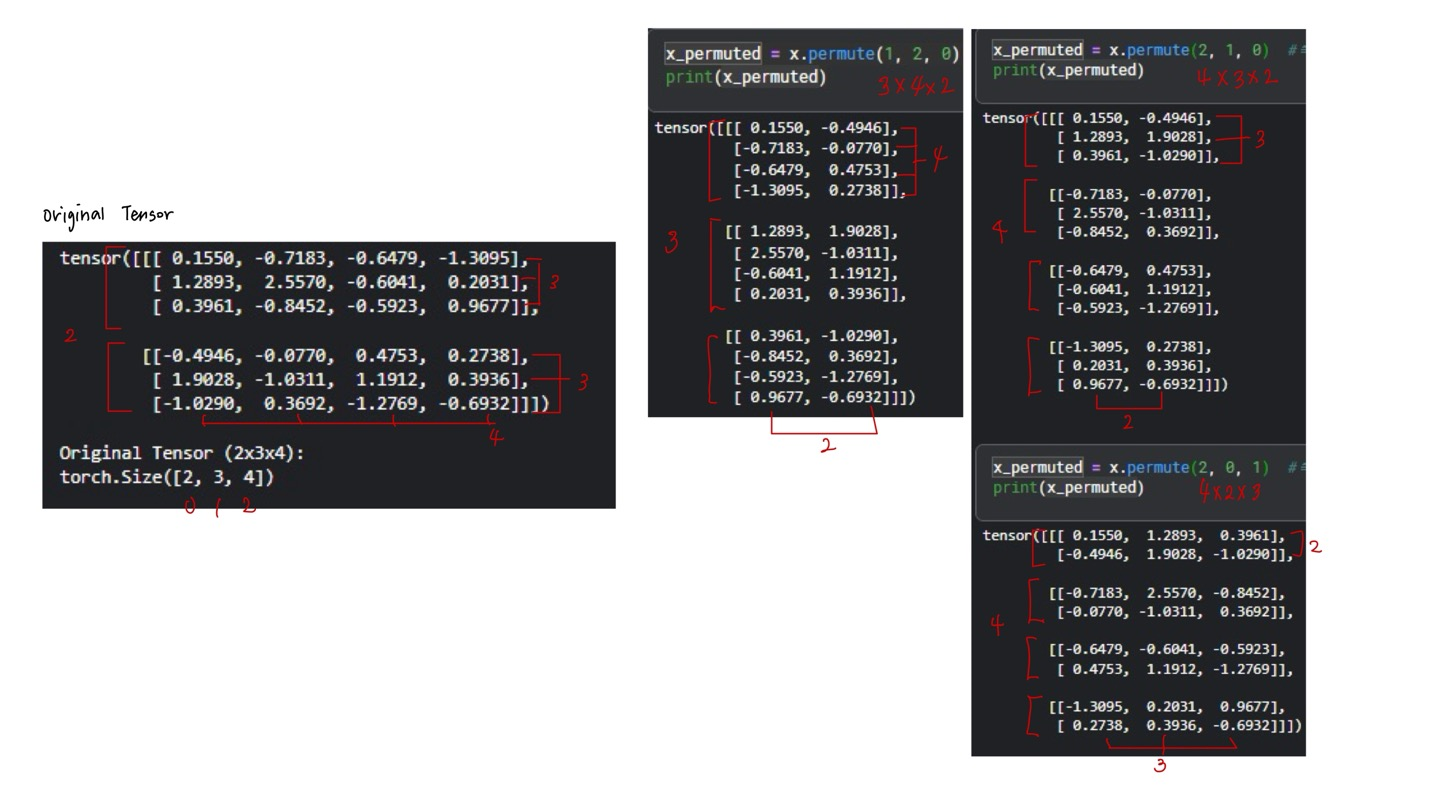
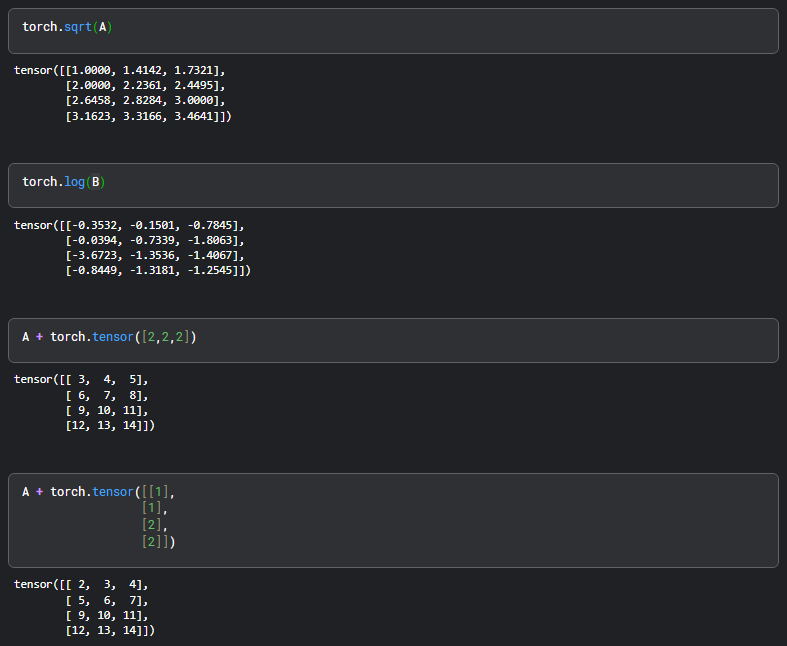

## Stack, Concat, Cat 연산

In [116]:
# 3x3 텐서 2개 생성
x1 = torch.randn(3, 3)
x2 = torch.randn(3, 3)
print("\nTwo 3x3 Tensors:")
print(x1)
print(x2)
print()


# dim=0으로 연결
x_concat = torch.cat([x1, x2], dim=0)
print("\nConcatenated Tensor along dim 0 (6x3):")
print(x_concat)
print(x_concat.size())
print()


# dim=1로 연결
x_concat_dim1 = torch.cat([x1, x2], dim=1)
print("\nConcatenated Tensor along dim 1 (3x6):")
print(x_concat_dim1)
print(x_concat_dim1.size())
print()

# stack으로 차원을 추가하고 쌓기
x_stack = torch.stack([x1, x2], dim=0)
print(x_stack)
print("\nStacked Tensor (2x3x3):")
print(x_stack.size())


Two 3x3 Tensors:
tensor([[-1.8171, -1.2574, -1.7403],
        [ 1.5511,  0.7910, -0.1457],
        [-0.8461,  0.0548,  1.2509]])
tensor([[-0.8489, -1.2112, -2.9800],
        [-0.0073, -0.6111,  0.4356],
        [ 0.9406, -0.7532, -0.1256]])


Concatenated Tensor along dim 0 (6x3):
tensor([[-1.8171, -1.2574, -1.7403],
        [ 1.5511,  0.7910, -0.1457],
        [-0.8461,  0.0548,  1.2509],
        [-0.8489, -1.2112, -2.9800],
        [-0.0073, -0.6111,  0.4356],
        [ 0.9406, -0.7532, -0.1256]])
torch.Size([6, 3])


Concatenated Tensor along dim 1 (3x6):
tensor([[-1.8171, -1.2574, -1.7403, -0.8489, -1.2112, -2.9800],
        [ 1.5511,  0.7910, -0.1457, -0.0073, -0.6111,  0.4356],
        [-0.8461,  0.0548,  1.2509,  0.9406, -0.7532, -0.1256]])
torch.Size([3, 6])

tensor([[[-1.8171, -1.2574, -1.7403],
         [ 1.5511,  0.7910, -0.1457],
         [-0.8461,  0.0548,  1.2509]],

        [[-0.8489, -1.2112, -2.9800],
         [-0.0073, -0.6111,  0.4356],
         [ 0.9406, -0.7532, -

In [123]:
# 2x3x4 텐서 생성
x = torch.arange(1.0,25.0).view(2, 3, 4)
print(x)
print("\nOriginal Tensor (2x3x4):")
print(x.size())
print()
print()

# 전체 텐서의 합
x_sum = x.sum()
print("\nSum of all elements:")
print(x_sum)
print()
print()

# dim=0 기준으로 합 계산 (2 축 제거, 남은 것은 3x4 텐서)
x_sum_dim0 = x.sum(dim=0)
print("\nSum along dim 0 (3x4):")
print(x_sum_dim0)
print(x_sum_dim0.size())
print()
print()

# dim=1 기준으로 합 계산 (3 축 제거, 남은 것은 2x4 텐서)
x_sum_dim1 = x.sum(dim=1)
print("\nSum along dim 1 (2x4):")
print(x_sum_dim1)
print(x_sum_dim1.size())
print()
print()

# dim=2 기준으로 합 계산 (마지막 축 제거, 남은 것은 2x3 텐서)
x_sum_dim2 = x.sum(dim=2)
print("\nSum along dim 2 (2x3):")
print(x_sum_dim2)
print(x_sum_dim2.size())
print()
print()

# 전체 텐서의 평균
x_mean = x.mean()
print("\nMean of all elements:")
print(x_mean)
print()
print()

# dim=0 기준으로 평균 계산 (3x4 텐서)
x_mean_dim0 = x.mean(dim=0)
print("\nMean along dim 0 (3x4):")
print(x_mean_dim0)
print(x_mean_dim0.size())
print()
print()

# dim=1 기준으로 평균 계산 (2x4 텐서)
x_mean_dim1 = x.mean(dim=1)
print("\nMean along dim 1 (2x4):")
print(x_mean_dim1)
print(x_mean_dim1.size())
print()
print()

# dim=2 기준으로 평균 계산 (2x3 텐서)
x_mean_dim2 = x.mean(dim=2)
print("\nMean along dim 2 (2x3):")
print(x_mean_dim2)
print(x_mean_dim2.size())
print()

tensor([[[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]],

        [[13., 14., 15., 16.],
         [17., 18., 19., 20.],
         [21., 22., 23., 24.]]])

Original Tensor (2x3x4):
torch.Size([2, 3, 4])



Sum of all elements:
tensor(300.)



Sum along dim 0 (3x4):
tensor([[14., 16., 18., 20.],
        [22., 24., 26., 28.],
        [30., 32., 34., 36.]])
torch.Size([3, 4])



Sum along dim 1 (2x4):
tensor([[15., 18., 21., 24.],
        [51., 54., 57., 60.]])
torch.Size([2, 4])



Sum along dim 2 (2x3):
tensor([[10., 26., 42.],
        [58., 74., 90.]])
torch.Size([2, 3])



Mean of all elements:
tensor(12.5000)



Mean along dim 0 (3x4):
tensor([[ 7.,  8.,  9., 10.],
        [11., 12., 13., 14.],
        [15., 16., 17., 18.]])
torch.Size([3, 4])



Mean along dim 1 (2x4):
tensor([[ 5.,  6.,  7.,  8.],
        [17., 18., 19., 20.]])
torch.Size([2, 4])



Mean along dim 2 (2x3):
tensor([[ 2.5000,  6.5000, 10.5000],
        [14.5000, 18.5000, 22.5000]])


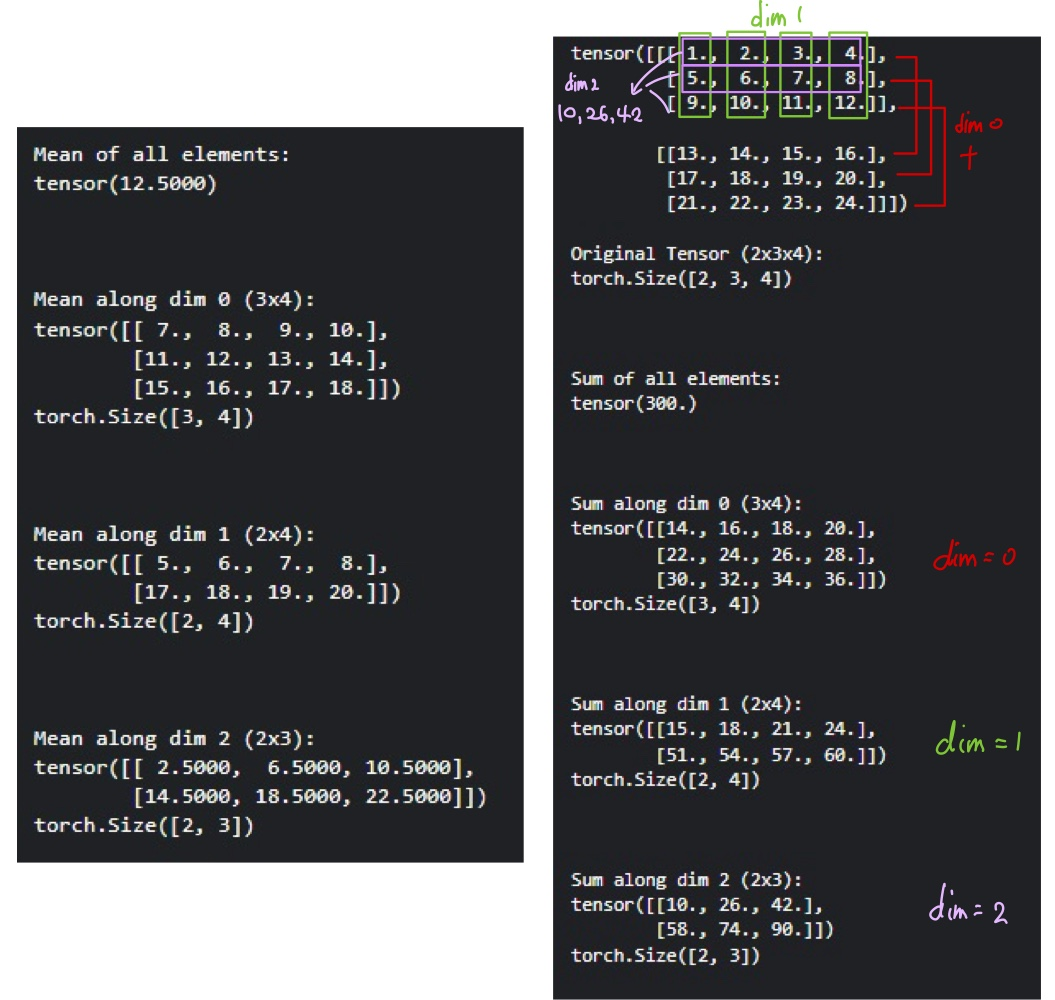

# CPU vs GPU

In [124]:
def cpu():
    with torch.device('cpu'):
        random_image_cpu = torch.randn((100, 3, 100, 100)) #랜덤한 이미지 100장 생성
        net_cpu = torch.nn.Conv2d(3, 32, 7)(random_image_cpu)  #2D convolution layer
        return net_cpu.sum()

def gpu():
    with torch.device('cuda'):
        random_image_gpu = torch.randn((100, 3, 100, 100))
        net_gpu = torch.nn.Conv2d(3, 32, 7)(random_image_gpu)
        return net_gpu.sum()

In [125]:
import timeit
print('CPU(1st it) (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('CPU(2nd it) (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('CPU(3rd it) (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU(1st it) (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU(2nd it) (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU(3rd it) (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)

CPU(1st it) (s):
1.742825110000922
CPU(2nd it) (s):
1.670024602999547
CPU(3rd it) (s):
1.696285062998868
GPU(1st it) (s):
0.4715691590008646
GPU(2nd it) (s):
0.0040636899993842235
GPU(3rd it) (s):
0.0036766189987247344
